In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv("train_BRCpofr.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [4]:
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [5]:
data.drop("id",axis=1,inplace=True)

In [6]:
data["gender"].value_counts()

Male      50497
Female    38895
Name: gender, dtype: int64

In [7]:
data["area"].value_counts()

Urban    62455
Rural    26937
Name: area, dtype: int64

In [8]:
data["qualification"].value_counts()

High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64

In [9]:
data["income"].value_counts()

5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64

In [10]:
data["marital_status"].value_counts()

1    51444
0    37948
Name: marital_status, dtype: int64

In [11]:
data["vintage"].value_counts()

6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64

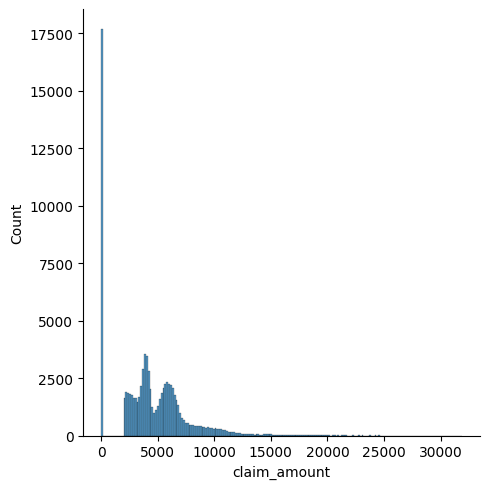

In [12]:
sns.displot(data["claim_amount"])

<AxesSubplot: xlabel='claim_amount'>

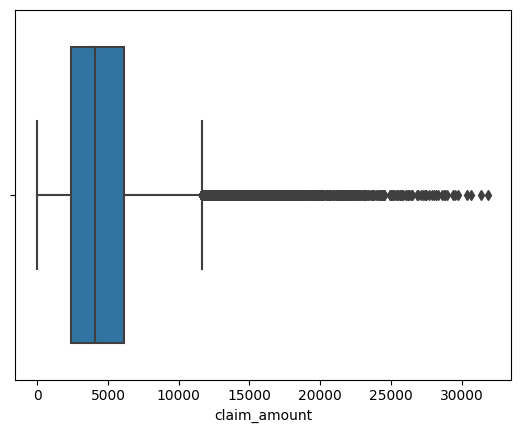

In [13]:
sns.boxplot(x=data["claim_amount"])

In [14]:
data["num_policies"].value_counts()

More than 1    60263
1              29129
Name: num_policies, dtype: int64

In [15]:
data["policy"].value_counts()

A    56644
B    24635
C     8113
Name: policy, dtype: int64

In [16]:
data["type_of_policy"].value_counts()

Platinum    47796
Silver      21010
Gold        20586
Name: type_of_policy, dtype: int64

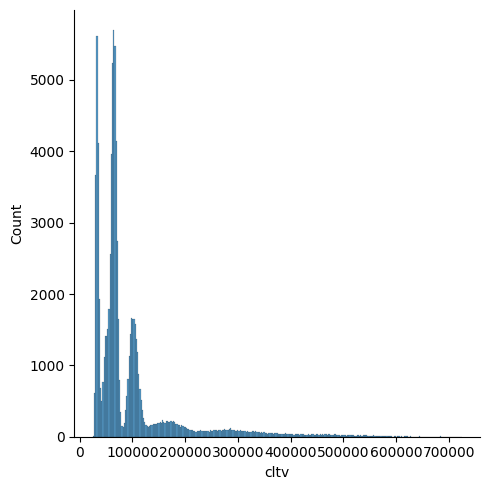

In [17]:
sns.displot(x=data["cltv"])

<AxesSubplot: xlabel='cltv'>

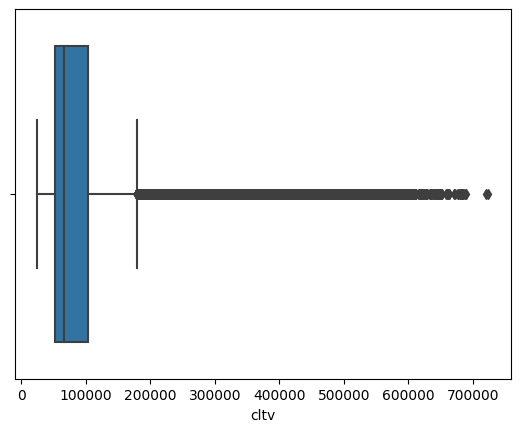

In [18]:
sns.boxplot(x=data["cltv"])

In [22]:
data[data["claim_amount"]==0].area.value_counts()

Rural    12709
Urban     4962
Name: area, dtype: int64

So majority of rural people does not claim ?

In [23]:
data[data["claim_amount"]>0].area.value_counts()

Urban    57493
Rural    14228
Name: area, dtype: int64

Rural people also claim, but less compared to amount of urban people

In [24]:
data.area.value_counts()

Urban    62455
Rural    26937
Name: area, dtype: int64

In total train set, urban count is more but claim is very high in urban

DOes that mean, urban people is more valuale ? Lets see

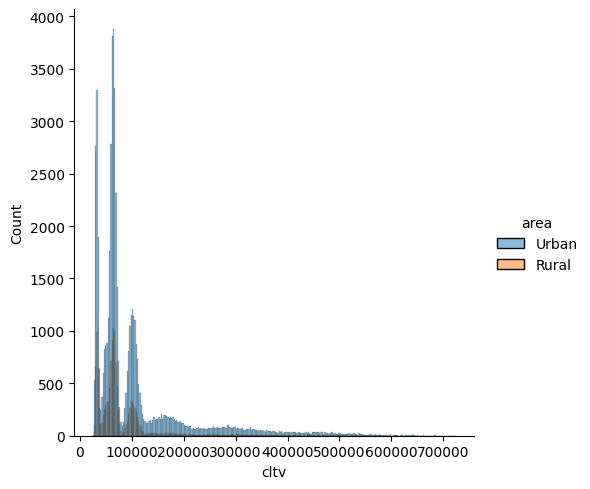

In [33]:
new=data[data["claim_amount"]>0]
new=new[new["cltv"]>10000]
sns.displot(x=new["cltv"],hue=new["area"])